# Exemplo de Relatório para Projeto
## Parte 1
Prof. Hélio Radke

### 1.1 Bibliotecas
Para ampliar o uso do R pode-se utilizar bibliotecas (*libraries*) adicionais. Em uma primeira leitura pode-se desconsiderar este passo, que pode demorar em torno de 5 minutos.

In [ ]:
ini <- Sys.time()
install.packages(c('skimr','tidyverse'), dep = TRUE)
Sys.time()-ini
library(skimr)
library(tidyverse)
library(MASS)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘extrafontdb’, ‘Rttf2pt1’, ‘Rcpp’, ‘covr’, ‘extrafont’, ‘feather’, ‘mockr’




Time difference of 1.76378 mins

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




### 1.2 Leitura e limpeza do banco de dados

Inicialmente procedemos com a leitura da base de dados [*Automobile Data Set from 1985 Ward's Automotive Yearbook*](https://archive.ics.uci.edu/ml/datasets/automobile). As linguagens usualmente permitem a leitura diretamente da URL.

In [ ]:
# lendo dados
url0 <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df <- read.csv(url0, header = FALSE)
# nomes das colunas
cn <- c('symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',  'wheel_base',
'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price')
colnames(df) <- cn
# estrutura
str(df)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized_losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel_type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num_of_doors     : chr  "two" "two" "two" "four" ...
 $ body_style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive_wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine_location  : chr  "front" "front" "front" "front" ...
 $ wheel_base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb_weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine_type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num_of_

Após a leitura é importante verificar a consistência dos dados a função `str`. É possível identificar 205 linhas, com exclamações na segunda coluna, que indicam uma informação faltante. Na linguagem R a simbologia formal deste tipo de dado é `NA`, e que pode facilmente ser substituído com a instrução a seguir. Verificam-se 59 células contendo valores faltantes, que podem ser retirados para a realização de algum modelo.

In [ ]:
# substituindo '?' por NA
df[df == '?'] <- NA
# número de células com NA em todo o banco de dados
sum(is.na(df))

[1] 59

Nota-se também que as colunas `normalized_losses`, `bore`, `stroke`, `horsepower`, `peak_rpm` e `price` estão classificadas como caracter (chr), quando na verdade são numéricas (num).

In [ ]:
df$normalized_losses <- as.numeric(df$normalized_losses)
df$bore <- as.numeric(df$bore)
df$stroke <- as.numeric(df$stroke)
df$horsepower <- as.numeric(df$horsepower)
df$peak_rpm <- as.numeric(df$peak_rpm)
df$price <- as.numeric(df$price)
str(df)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized_losses: num  NA NA NA 164 164 NA 158 NA 158 NA ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel_type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num_of_doors     : chr  "two" "two" "two" "four" ...
 $ body_style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive_wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine_location  : chr  "front" "front" "front" "front" ...
 $ wheel_base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb_weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine_type      : chr  "dohc" "dohc" "ohcv" "ohc

Será considerado um banco de dados sem `NA` para modelagem. Para isso foi criado o banco de dados `df0na`, com 159 linhas.

In [ ]:
df0na <- na.omit(df)
str(df0na)

'data.frame':	159 obs. of  26 variables:
 $ symboling        : int  2 2 1 1 2 0 0 0 2 1 ...
 $ normalized_losses: num  164 164 158 158 192 192 188 188 121 98 ...
 $ make             : chr  "audi" "audi" "audi" "audi" ...
 $ fuel_type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "turbo" ...
 $ num_of_doors     : chr  "four" "four" "four" "four" ...
 $ body_style       : chr  "sedan" "sedan" "sedan" "sedan" ...
 $ drive_wheels     : chr  "fwd" "4wd" "fwd" "fwd" ...
 $ engine_location  : chr  "front" "front" "front" "front" ...
 $ wheel_base       : num  99.8 99.4 105.8 105.8 101.2 ...
 $ length           : num  177 177 193 193 177 ...
 $ width            : num  66.2 66.4 71.4 71.4 64.8 64.8 64.8 64.8 60.3 63.6 ...
 $ height           : num  54.3 54.3 55.7 55.9 54.3 54.3 54.3 54.3 53.2 52 ...
 $ curb_weight      : int  2337 2824 2844 3086 2395 2395 2710 2765 1488 1874 ...
 $ engine_type      : chr  "ohc" "ohc" "ohc" "ohc" ...
 $ num_of_cylinders :

### Encontrando exemplos para cada tipo de variável:
#### Qualitativa nominal: tipo de combustível (`fuel_type`)
#### Qualitativa ordinal: não encontrada
#### Quantitativa discreta: número de portas (`num_of_doors`)
#### Quantitativa continua: Milhas por galão na cidade (`city_mpg`)





### 1.3 Estatísticas descritivas

Para as variáveis numéricas (numéricas ou inteiras) foi criado um filtro, de maneira a resumir as referidas colunas através da função `summary`.

In [ ]:
fltr_num <- sapply(df, is.numeric) | sapply(df, is.integer)
summary(df[,fltr_num])

   symboling       normalized_losses   wheel_base         length     
 Min.   :-2.0000   Min.   : 65       Min.   : 86.60   Min.   :141.1  
 1st Qu.: 0.0000   1st Qu.: 94       1st Qu.: 94.50   1st Qu.:166.3  
 Median : 1.0000   Median :115       Median : 97.00   Median :173.2  
 Mean   : 0.8341   Mean   :122       Mean   : 98.76   Mean   :174.0  
 3rd Qu.: 2.0000   3rd Qu.:150       3rd Qu.:102.40   3rd Qu.:183.1  
 Max.   : 3.0000   Max.   :256       Max.   :120.90   Max.   :208.1  
                   NA's   :41                                        
     width           height       curb_weight    engine_size         bore     
 Min.   :60.30   Min.   :47.80   Min.   :1488   Min.   : 61.0   Min.   :2.54  
 1st Qu.:64.10   1st Qu.:52.00   1st Qu.:2145   1st Qu.: 97.0   1st Qu.:3.15  
 Median :65.50   Median :54.10   Median :2414   Median :120.0   Median :3.31  
 Mean   :65.91   Mean   :53.72   Mean   :2556   Mean   :126.9   Mean   :3.33  
 3rd Qu.:66.90   3rd Qu.:55.50   3rd Qu.:2935

### 1.4 Tabela de frequências

Para as variáveis caracter (chr) foram criadas tabelas.

In [ ]:
fltr_chr <- sapply(df, is.character)
sapply(df[,fltr_chr], table, useNA = 'always')

$make

  alfa-romero          audi           bmw     chevrolet         dodge 
            3             7             8             3             9 
        honda         isuzu        jaguar         mazda mercedes-benz 
           13             4             3            17             8 
      mercury    mitsubishi        nissan        peugot      plymouth 
            1            13            18            11             7 
      porsche       renault          saab        subaru        toyota 
            5             2             6            12            32 
   volkswagen         volvo          <NA> 
           12            11             0 

$fuel_type

diesel    gas   <NA> 
    20    185      0 

$aspiration

  std turbo  <NA> 
  168    37     0 

$num_of_doors

four  two <NA> 
 114   89    2 

$body_style

convertible     hardtop   hatchback       sedan       wagon        <NA> 
          6           8          70          96          25           0 

$drive_wheels

 4wd  

Para as estatísticas descritivas pode-se usar as facilidades da função `skimr::skim`. Esta simbologia indica que a função `skim` está disponível na biblioteca `skimr`.

In [ ]:
skimr::skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             205   
Number of columns          26    
_______________________          
Column type frequency:           
  character                10    
  numeric                  16    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
   skim_variable    n_missing complete_rate min max empty n_unique whitespace
 1 make                     0         1       3  13     0       22          0
 2 fuel_type                0         1       3   6     0        2          0
 3 aspiration               0         1       3   5     0        2          0
 4 num_of_doors             2         0.990   3   4     0        2          0
 5 body_style               0         1       5  11     0        5          0
 6 drive_wheels             0         1       3   3     0        3   

ERROR: ignored

Verificação da variável preço (`price`) por fabricante (`make`).

In [ ]:
by(df$price, df$make, summary)

df$make: alfa-romero
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13495   14998   16500   15498   16500   16500 
------------------------------------------------------------ 
df$make: audi
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13950   15800   17580   17859   18618   23875       1 
------------------------------------------------------------ 
df$make: bmw
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16430   19959   22835   26119   32290   41315 
------------------------------------------------------------ 
df$make: chevrolet
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5151    5723    6295    6007    6435    6575 
------------------------------------------------------------ 
df$make: dodge
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5572    6377    7609    7875    8558   12964 
------------------------------------------------------------ 
df$make: honda
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5399    6855    7295    8185    909

### 1.5 Gráficos

Podemos visualizar o boxplot dos preços por marca.

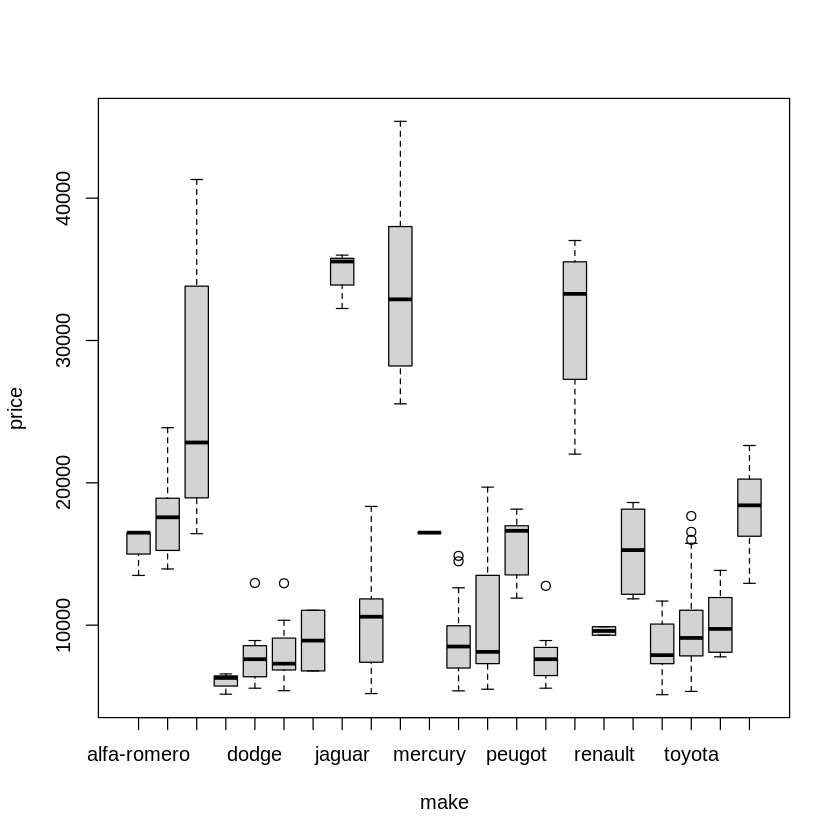

In [ ]:
boxplot(price ~ make, data = df)

Pode-se ordenar as marcas pelo preço mediano e utilizar a bibioteca `ggplot2` para uma visualização mais elaborada.

Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”


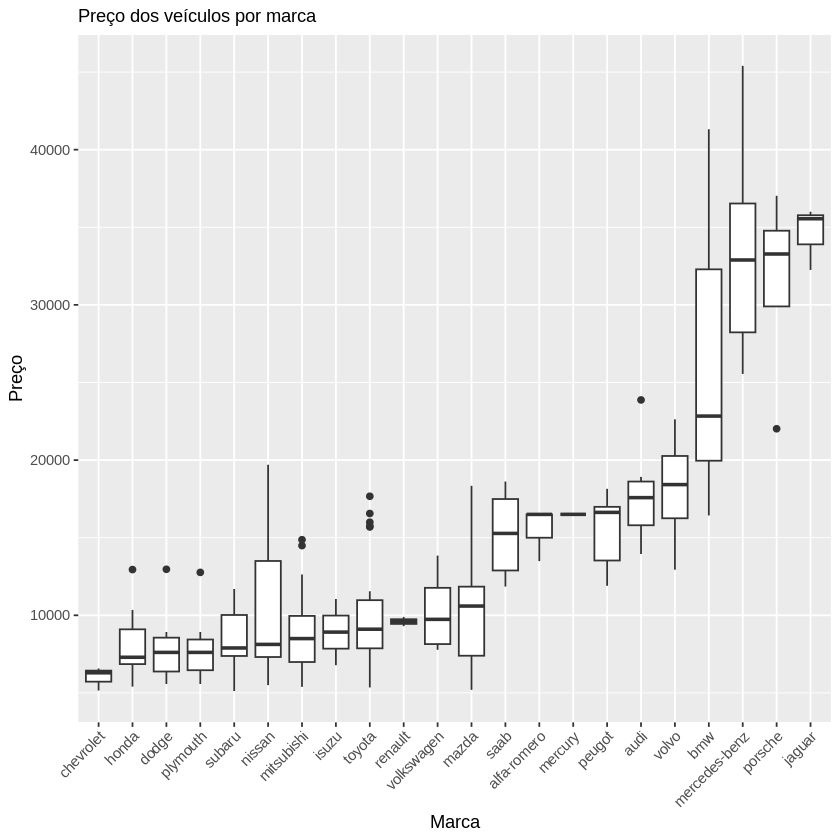

In [ ]:
df %>%
  ggplot(aes(x = reorder(make, price, median, na.rm = TRUE), y = price)) +
  geom_boxplot() +
  labs(y = 'Preço', x = 'Marca',
       subtitle = 'Preço dos veículos por marca') +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

Para verificar o comportamento probabilístico de uma variável, deve-se construir um histograma, a distribuição acumulada empírica e a função de distribuição acumulada teórica. os parâmetros do modelo escolhido deve ser extraídos dos dados. Neste caso, como foi usada a distribuição Normal, a média e o desvio-padrão da variável foram utilizados.

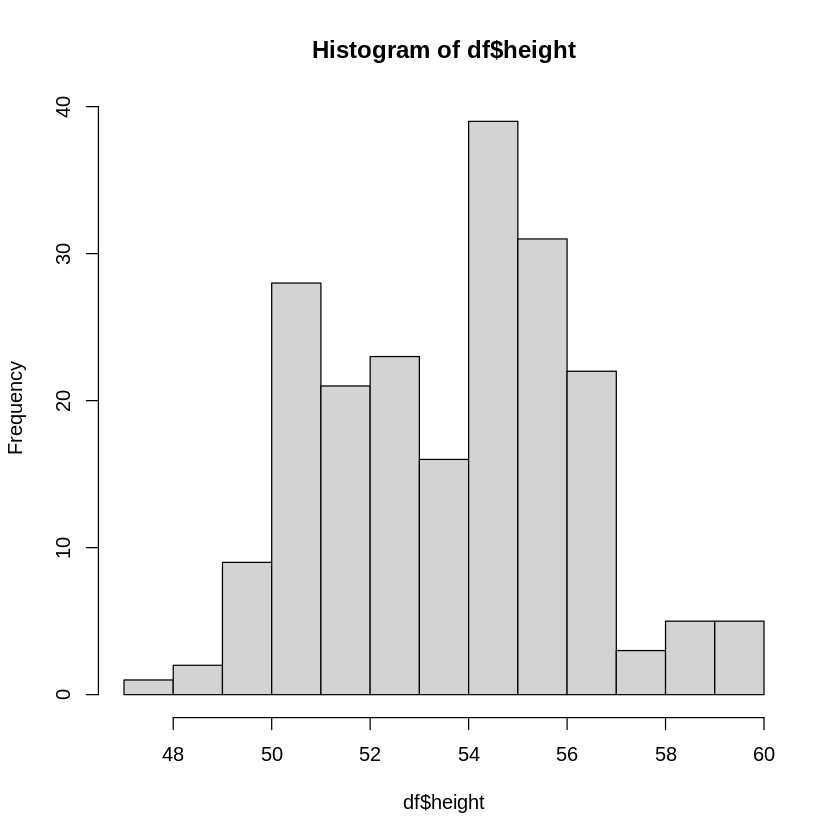

Média =  53.72488
Desvio Padrão (amostral) =  2.443522

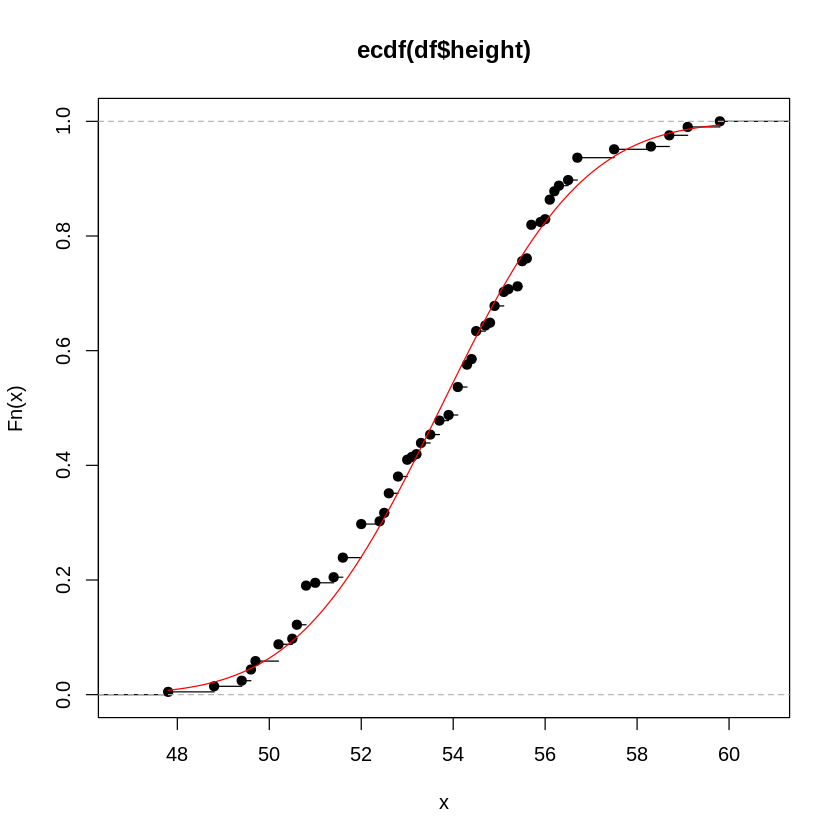

In [ ]:
hist(df$height) # Mostra o Histograma da variável height
cs <- ecdf(df$height) # Cria a função acumulada empírica (a partir dos dados) para a variável height
plot(cs) # Mostra a distribuição cumulativa empírica (a partir dos dados) da variável height
media <- mean(df$height)
desvio <- sd(df$height, na.rm=TRUE)
cat('Média = ', media)
cat('\n')
cat('Desvio Padrão (amostral) = ', desvio)
curve(pnorm(x,media,desvio), min(df$height), max(df$height), add = TRUE, col = 'red')

Aqui termina o que se espera na Parte 1.

Daqui em diante, Parte 2.

## Parte 2
Prof. Filipe Zabala


### 2.1 Probabilidade
Pode-se calcular probabilidades (incondicionais) envolvendo variáveis de interesse. A variável 'número de portas' (`num_of_doors`) possui as frequências a seguir.

In [ ]:
(tab <- table(df0na$num_of_doors))


four  two 
  95   64 

Portanto, a probabilidade (incondicional) de um carro quatro portas ser selecionado é $P(\text{four})=\frac{95}{159} \approx 0.5975$. De um carro duas portas, $P(\text{two})=1-\frac{95}{159} \approx 0.4025$.

In [ ]:
(n <- sum(tab))
# Decimal
round(p4 <- tab[1]/n, 4)
round(p2 <- tab[2]/n, 4)
# Fração
MASS::fractions(p4)
MASS::fractions(p2)

[1] 159

four 
0.5975

two 
0.4025

four 
95/159

two 
64/159

### 2.2 Probabilidade condicional
Pode-se calcular probabilidades condicionais envolvendo variáveis de interesse. A variável 'número de portas' (`num_of_doors`) cruzada com o 'tipo de combustível' (`fuel_type`) possui as frequências a seguir.

In [ ]:
tab2 <- table(df0na$num_of_doors, df0na$fuel_type)
(tab2 <- addmargins(tab2))

,diesel,gas,Sum
four,12,83,95
two,3,61,64
Sum,15,144,159


A probabilidade de um carro quatro portas ser selecionado, dado que é movido a diesel, é $P(\text{four}|\text{diesel})=\frac{12}{15} = 0.8$. A probabilidade de um carro duas portas ser selecionado, dado que é movido a diesel, é $P(\text{two}|\text{diesel})=1-\frac{12}{15} = 0.2$.

In [ ]:
(p4diesel <- tab2[1,1]/tab2[3,1])
(p2diesel <- 1-p4diesel)

[1] 0.8

[1] 0.2

A probabilidade de um carro quatro portas ser selecionado, dado que é movido a gasolina, é $P(\text{four}|\text{gas})=\frac{83}{144} \approx 0.5764$. A probabilidade de um carro duas portas ser selecionado, dado que é movido a gasolina, é $P(\text{two}|\text{gas})=1-\frac{83}{144} \approx 0.4236$.

In [ ]:
round(p4gas <- tab2[1,2]/tab2[3,2], 4)
round(p2gas <- 1-p4gas, 4)

[1] 0.5764

[1] 0.4236

### 2.3 Intervalos de confiança
Pode-se calcular o intervalo de confiança para a variável altura (height).

In [ ]:
# Calculando o IC95% via função t.test
result <- t.test(df0na$height)

# Extraindo o IC95%
(ic <- result$conf.int)

[1] 53.54400 54.25474
attr(,"conf.level")
[1] 0.95

Para praticar o método, podemos comparar com o resultado obtido manualmente.

In [ ]:
# Fazendo na mão
m <- mean(df0na$height)
s <- sd(df0na$height)
n <- length(df0na$height)
(LI <- m-abs(qt(0.025,n-1))*s/sqrt(n))
(LS <- m+abs(qt(0.025,n-1))*s/sqrt(n))

[1] 53.544

[1] 54.25474

### 2.4 Teste de hipóteses
Pode-se testar hipóteses se a média da altura (`height`) pode ser considerada igual à sua média amostral arredondada no inteiro, no caso 54, formalmente $H_0: \mu = 54$ *vs* $H_1: \mu \ne 54$.   
Como p-value = 0.5768, maior que qualquer nível de significância usual (que em geram variam de 0.001 a 0.1), não é possível rejeitar a hipótese $H_0: \mu = 54$.

In [ ]:
# Resumo de height
summary(df0na$height)
# Média arredondada para o inteiro
(ma <- round(mean(df0na$height),0))
# Via função t.test
t.test(df0na$height, mu = ma)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  49.40   52.25   54.10   53.90   55.50   59.80 

[1] 54


	One Sample t-test

data:  df0na$height
t = -0.55928, df = 158, p-value = 0.5768
alternative hypothesis: true mean is not equal to 54
95 percent confidence interval:
 53.54400 54.25474
sample estimates:
mean of x 
 53.89937 


### 2.5 Correlação de Pearson
Vejamos a correlação entre o rendimento do carro na cidade (`city_mpg`) e na estrada (highway_mpg`) fazendo um gráfico` de dispersão e calculando o coeficiente de correlação de Pearson.  
Pelo gráfico percebe-se um bom alinhamento, corroborado pela correlação amostral de $r \approx 0.9720$ (p-value < 2.2e-16).



	Pearson's product-moment correlation

data:  df0na$city_mpg and df0na$highway_mpg
t = 51.829, df = 157, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9618722 0.9794640
sample estimates:
      cor 
0.9719988 


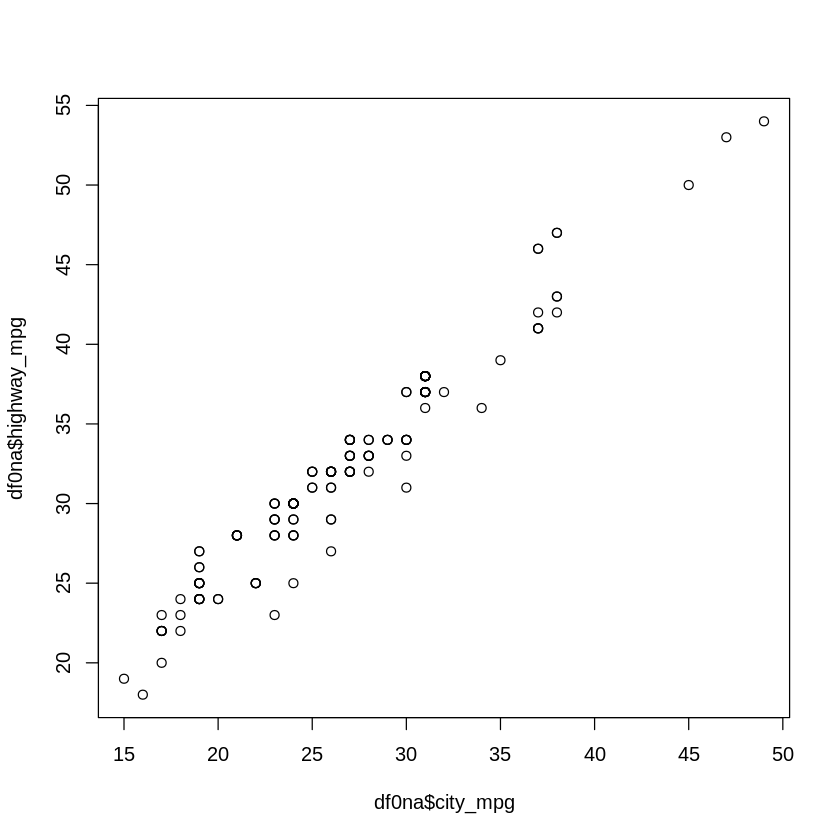

In [ ]:
cor.test(df0na$city_mpg, df0na$highway_mpg)
plot(df0na$city_mpg, df0na$highway_mpg)

### 2.6 Regressão linear simples
Podemos estar interessados em estimar o desempenho do carro na estrada com base nos valores observados na cidade dos 159 veículos avaliados. Utilizando a função `lm` (*linear model*) podemos ajustar uma regressão linear simples envolvendo as duas variáveis em questão.


Call:
lm(formula = highway_mpg ~ city_mpg, data = df0na)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4551 -0.6334  0.3963  1.3072  3.1289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.77163    0.54059   8.827 1.99e-15 ***
city_mpg     1.02972    0.01987  51.829  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.523 on 157 degrees of freedom
Multiple R-squared:  0.9448,	Adjusted R-squared:  0.9444 
F-statistic:  2686 on 1 and 157 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.94214, p-value = 4.292e-06


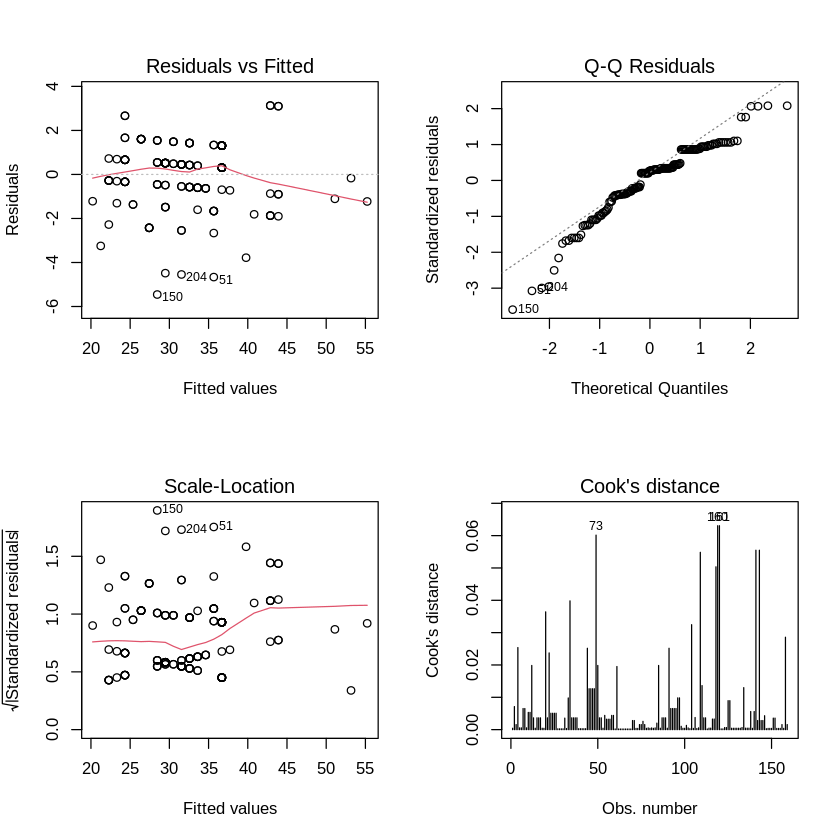

In [ ]:
fit <- lm(highway_mpg ~ city_mpg, data = df0na)
# diagnóstico
summary(fit)
shapiro.test(fit$residuals)
par(mfrow = c(2,2))
plot(fit, which = 1:4)

O coeficiente estimado do intercepto (`Intercept = 4.77163`) é bastante significativo (`p-value = 1.99e-15`), assim como o coeficiente da variável rendimento na cidade (`city_mpg = 1.02972`, `p-value < 2e-16`).   
Os gráficos de resíduos não indicam qualquer comportamento de crescimento ou decrescimento, bem como não indica potenciais pontos de alavanca pela distância de Cook. Apenas a suposição de normalidade dos resíduos não parece estar sendo satisfeita, dado o descolamento das caudas da distribuição residual conforme QQ plot dos resíduos e do teste de Shapiro-Wilk de normalidade (`W = 0.94214`, `p-value = 4.292e-06`).   
Pode-se considerar este um modelo aceitável, indicando que para cada milha feita com 1 galão na cidade espera-se 1.02972 milha na estrada com 1 galão.   
Para alguém que rodar 26 milhas na cidade por galão de combustível, espera-se rodar $4.77163 + 1.02972 \times 26 \approx 31.54$ milhas por galão na estrada.

In [ ]:
4.77163 + 1.02972 * 26

[1] 31.54435

### 2.7 Regressão linear múltipla
Pode-se estar interessado em modelar o preço (`price`) dos veículos com base nas demais variáveis disponíveis. Para ajuste do modelo linear é preciso que nenhuma linha possua valores faltantes. Desta forma será utilizado o banco de dados `df0na`. A estratégia é a de utilizar o procedimento do modelo saturado, i.e., iniciar com o modelo contendo todas as variáveis candidatas, seguido da aplicação do *stepwise* através da função `step`. Note que foram retiradas as variáveis `symboling` e `engine_location` de forma a permitir a modelagem.


Call:
lm(formula = price ~ make + aspiration + num_of_doors + body_style + 
    drive_wheels + wheel_base + length + width + height + curb_weight + 
    engine_type + fuel_system + bore + compression_ratio + horsepower + 
    peak_rpm + city_mpg + highway_mpg, data = df0na)

Residuals:
    Min      1Q  Median      3Q     Max 
-3009.2  -621.0     0.0   692.2  2648.7 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.839e+04  1.289e+04   1.427 0.156439    
makebmw              1.147e+03  1.236e+03   0.928 0.355367    
makechevrolet       -5.398e+03  1.337e+03  -4.039 9.76e-05 ***
makedodge           -6.868e+03  1.054e+03  -6.517 2.02e-09 ***
makehonda           -2.545e+03  1.122e+03  -2.269 0.025179 *  
makejaguar           7.491e+02  1.961e+03   0.382 0.703144    
makemazda           -4.522e+03  9.349e+02  -4.837 4.17e-06 ***
makemercedes-benz    2.215e+03  1.230e+03   1.802 0.074261 .  
makemit


	Shapiro-Wilk normality test

data:  fit1$residuals
W = 0.99202, p-value = 0.5224


Warning message:
“not plotting observations with leverage one:
  9, 19, 33, 91”


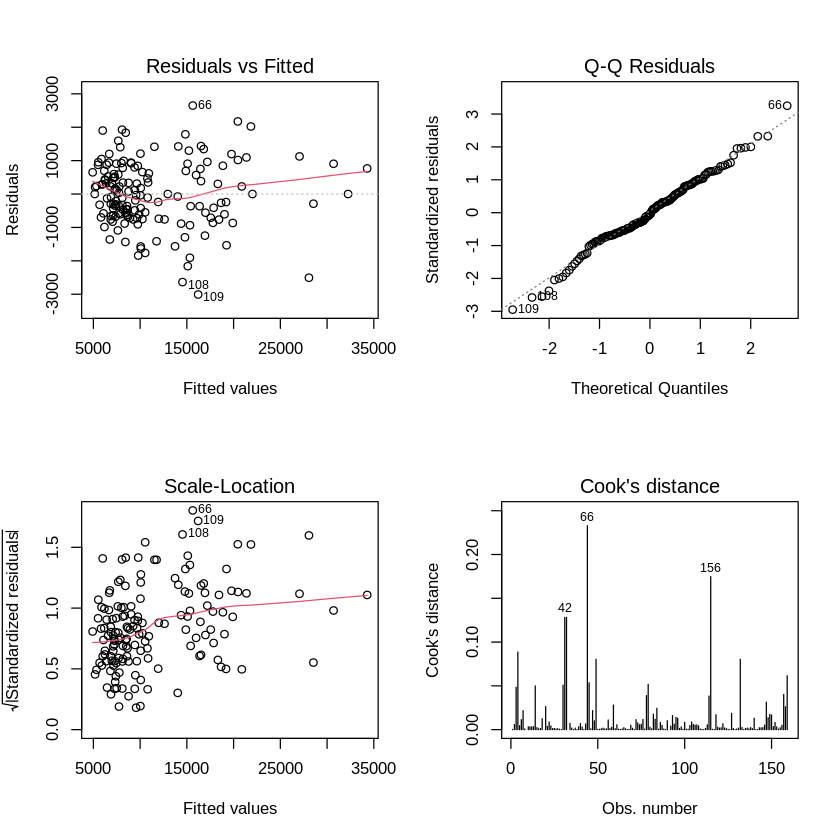

In [ ]:
# modelo saturado
fit0 <- lm(price ~ normalized_losses + make + fuel_type + aspiration +
  num_of_doors + body_style + drive_wheels + wheel_base +
    length + width + height + curb_weight + engine_type + num_of_cylinders +
    engine_size + fuel_system + bore + stroke + compression_ratio +
    horsepower + peak_rpm + city_mpg + highway_mpg,
    data = df0na)
# modelo stepwise
fit1 <- step(fit0, trace = 0)
# diagnóstico
summary(fit1)
shapiro.test(fit1$residuals)
par(mfrow = c(2,2))
plot(fit1, which = 1:4)

Note que o modelo stewise retirou as variáveis `normalized_losses`, `fuel_type`, `num_of_cylinders`, `engine_size` e `stroke`. Os gráficos de resíduos não indicam qualquer comportamento de crescimento ou decrescimento, bem como não indica potenciais pontos de alavanca pela distância de Cook. A suposição de normalidade dos resíduos parece estar sendo satisfeita, dada a boa aderência da distribuição residual conforme QQ plot dos resíduos e do teste de Shapiro-Wilk de normalidade (`W = 0.99202`, `p-value = 0.5224`).   


## Manchetes

1. Chevrolet: o menor custo de investimento.   
  **Detalhes** Os resumos da seção 1.4 via `by(df$price, df$make, summary)` e os boxplots da seção 1.5 mostram que a chevrolet tem os menores preços dentre todas as marcas consideradas.

2. Se bebe na estrada, o que dirá na cidade!   
  **Detalhes** A correlação calculada e testada na seção 2.5 via `cor.test(df0na$city_mpg, df0na$highway_mpg)` indica um valor alto (`r = 0.9719988`) e significativo (`p-value < 2.2e-16`), o que sugere que o aumento de uma varável deve levar a um aumento (linear) da outra variável.

3. *Be bothered by the bore.* [Incomode-se com o diâmetro.]   
  **Detalhes** O coeficiente da variável `bore` ([diâmetro de cada cilindro de um pistão](https://en.wikipedia.org/wiki/Bore_(engine))) da seção 2.7 é negativo (`-2.515e+03`) e significativo (`p=0.001606`), o que indica que quanto maior o `bore`, menor o preço esperado.

